In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF

In [49]:
df = pd.read_csv("merge.csv")

In [50]:
#df.isnull().sum(axis = 0)
#df_1 = df.drop(['lunknown' , 'runknown' , 'lcorpuscallosum' , 'rcorpuscallosum'], axis =1 )
column_get = df.columns[1:-1]
df_2 = df[column_get]
df = df_2

In [11]:
df

,lunknown,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,rcuneus,lentorhinal,...,lsupramarginal_depth,rsupramarginal_depth,lfrontalpole_depth,rfrontalpole_depth,ltemporalpole_depth,rtemporalpole_depth,ltransversetemporal_depth,rtransversetemporal_depth,linsula_depth,rinsula_depth
0,2.0747,2.6280,2.6963,2.4282,2.7660,2.7721,2.7411,2.0004,1.8787,3.8441,...,10.2347,10.6047,2.5094,2.8617,5.1792,6.3506,24.0322,20.6994,24.8324,22.6459
1,2.4563,2.7344,2.7884,2.6396,2.1937,2.6874,2.7192,2.1154,2.0305,3.8834,...,10.0712,10.1304,1.2484,2.4107,3.9791,5.0805,22.8929,19.8844,23.5273,21.6189
2,2.0692,2.3370,2.5557,2.6171,2.3134,2.4745,2.4894,1.9240,1.8758,3.7335,...,11.0105,11.5056,1.6841,2.8893,4.9262,4.7448,24.4069,22.3064,24.4828,24.6495
3,1.9997,2.3939,2.4642,2.4548,2.3990,2.4161,2.3761,2.0290,2.0318,3.4985,...,10.3881,11.1560,1.3998,1.4232,5.2528,5.4702,24.4611,23.4170,25.5642,24.8088
4,2.1088,2.6595,2.8114,2.7200,2.6090,2.6690,2.5294,2.1333,2.1093,3.3291,...,10.6835,11.6476,1.5022,1.4773,6.2437,7.2587,24.3425,22.0236,24.9930,24.3753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.3508,2.4794,2.2818,2.3706,2.2669,2.2365,2.3091,1.9197,1.8442,3.5951,...,8.9905,10.2787,2.1130,1.0842,5.2642,6.8048,19.6186,18.7980,22.3013,22.2258
196,2.2589,2.4546,2.5992,2.7444,2.3330,2.2572,2.1604,1.8154,1.7552,2.9150,...,10.1031,11.1252,1.5249,2.9309,6.0154,5.7797,21.6758,19.6336,23.7260,24.0841
197,2.4972,2.7633,2.4429,2.4182,1.9306,2.7052,2.6240,2.2174,2.1545,3.0452,...,10.2784,10.2830,2.7576,1.5982,5.9045,8.6118,22.4387,22.1694,23.5798,23.6531
198,2.3142,2.2496,2.6059,2.2048,2.0665,2.3724,2.2980,1.9429,1.8892,3.5355,...,9.1336,11.5673,2.1494,2.1274,7.5231,6.9950,21.3931,20.0942,24.7024,23.6751


In [51]:
data = df.copy()

# Create StandardScaler and fit 
scaler = StandardScaler()
scaler.fit(data)

# Transform data
normalized_data = scaler.transform(data)  
normalized_data = pd.DataFrame(normalized_data, columns=data.columns)

# Confirm normalization

normalized_data

,lunknown,lbankssts,rbankssts,lcaudalanteriorcingulate,rcaudalanteriorcingulate,lcaudalmiddlefrontal,rcaudalmiddlefrontal,lcuneus,rcuneus,lentorhinal,...,lsupramarginal_depth,rsupramarginal_depth,lfrontalpole_depth,rfrontalpole_depth,ltemporalpole_depth,rtemporalpole_depth,ltransversetemporal_depth,rtransversetemporal_depth,linsula_depth,rinsula_depth
0,0.279720,1.094824,0.940056,0.178395,2.170983,2.260812,2.077994,0.524469,-0.203139,1.134591,...,0.077779,-0.641135,0.669792,0.742519,-1.067376,-0.753000,1.109206,-0.283844,0.565510,-0.700794
1,1.146677,1.803305,1.508960,1.105225,-0.297759,1.689087,1.923250,1.305995,0.899484,1.250535,...,-0.084969,-1.174507,-1.311768,0.110413,-2.148388,-1.737158,0.453995,-0.778302,-0.337172,-1.381055
2,0.267224,-0.842847,0.071567,1.006580,0.218593,0.252011,0.299503,0.005263,-0.224204,0.808293,...,0.850009,0.371968,-0.627101,0.781202,-1.295271,-1.997280,1.324696,0.691117,0.323706,0.626342
3,0.109327,-0.463969,-0.493630,0.295016,0.587848,-0.142189,-0.501065,0.718831,0.908927,0.114986,...,0.230473,-0.021173,-1.073855,-1.273634,-1.001080,-1.435192,1.355867,1.364915,1.071665,0.731859
4,0.357192,1.304572,1.651031,1.457719,1.493729,1.564887,0.582140,1.427641,1.471860,-0.384786,...,0.524514,0.531654,-0.912942,-1.197810,-0.108508,-0.049344,1.287660,0.519544,0.676590,0.444719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.364909,0.105347,-1.620319,-0.074138,0.018005,-1.354489,-0.974482,-0.023959,-0.453735,0.399980,...,-1.160695,-1.007737,0.046881,-1.748766,-0.990811,-0.401056,-1.429056,-1.437417,-1.185144,-0.979059
196,0.698204,-0.059788,0.340267,1.564694,0.303142,-1.214764,-2.025183,-0.732769,-1.100200,-1.606482,...,-0.053215,-0.055809,-0.877271,0.839508,-0.314153,-1.195371,-0.245960,-0.930462,-0.199740,0.251835
197,1.239598,1.995741,-0.625201,0.134553,-1.432698,1.809237,1.250575,1.999174,1.800177,-1.222360,...,0.121278,-1.002901,1.059818,-1.028360,-0.414049,0.999128,0.192784,0.608000,-0.300860,-0.033649
198,0.823840,-1.424814,0.381653,-0.801046,-0.846464,-0.437164,-1.052913,0.133706,-0.126871,0.224145,...,-1.018254,0.441353,0.104081,-0.286651,1.043935,-0.253676,-0.408541,-0.651017,0.475594,-0.019077


In [52]:
normalized_data[normalized_data < 0].sum().sum()

-21904.08867453433

In [48]:
normalized_data[normalized_data < 0].sum().sum()
    

0.0

In [31]:
normalized_data[normalized_data < 0].empty

False

In [53]:
for col in normalized_data.columns:
    
    # Get column min 
    min_val = normalized_data[col].min()
    
    # Shift column by its min value
    normalized_data[col] = normalized_data[col] + abs(min_val)
    

#After checking all of the columns were 0 in the min value

In [55]:
normalized_data[normalized_data < 0]
normalized_data[normalized_data < 0].sum().sum() = 0

SyntaxError: cannot assign to function call (1640521368.py, line 2)

In [7]:
data_array = normalized_data.to_numpy()
data_array.shape

(200, 276)

In [233]:
data_array[data_array < 0]

array([], dtype=float64)

In [209]:

# Create an NMF model with 2 components
model = NMF(n_components=2,  random_state = 42)

# Fit the model to the data
model.fit(data_array)

# Extract the basis vectors and coefficients
W = model.components_
H = model.transform(data_array)



/Users/ahmadrezasohrabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/ahmadrezasohrabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [131]:
W[0]

array([1.32863976, 0.18387971, 0.46223874, 0.79425782, 0.69999193,
       0.50358596, 0.39303819, 0.38864812, 0.86033144, 1.94018991,
       0.8192594 , 0.73214279, 1.03673349, 0.93648522, 0.22079999,
       0.92793182, 0.39722441, 1.15971195, 1.50646322, 0.36999908,
       0.53189012, 0.45091931, 0.81850894, 0.65508613, 1.09114773,
       1.44796602, 1.05938634, 0.02340005, 0.29620323, 1.23654376,
       1.08798506, 0.63238551, 0.45213315, 0.2689878 , 0.21075091,
       0.5462508 , 0.6178574 , 0.23736542, 0.35191872, 0.98857111,
       0.88516915, 0.08011037, 0.30093948, 0.76284012, 0.90519378,
       0.49670538, 0.54244341, 0.32197557, 0.50789837, 1.23063042,
       0.77953775, 0.26700827, 0.13265306, 0.32048897, 0.06683244,
       0.38265979, 0.17890186, 0.36235069, 0.38576018, 0.93874145,
       0.12939982, 0.31617478, 0.24189109, 1.33431778, 0.70468143,
       0.94324074, 0.5930445 , 0.80244521, 0.86655634, 0.76398014,
       1.41458648, 1.70897581, 1.38820988, 1.25545787, 1.38376

In [213]:
from sklearn.metrics import consensus_score

# Test range of components
k_range = range(2, 10)

stability = []
for k in k_range:

    # Perform OPNMF
    nmf = NMF(n_components=k, init='nndsvd')
    W = nmf.fit_transform(data_array)
    
    # Resplit data and redo OPNMF
    X1 = data_array[:len(data_array)//2] 
    X2 = data_array[len(data_array)//2:]
    
    nmf = NMF(n_components=k, init='nndsvd')
    W1 = nmf.fit_transform(X1)  
    nmf = NMF(n_components=k, init='nndsvd')
    W2 = nmf.fit_transform(X2)
    
    # Compute consensus between splits
    consensus = consensus_score(W1, W2) 
    stability.append(consensus)

# Plot stability profile    
plt.plot(k_range, stability)
plt.xlabel('Num Components')
plt.ylabel('Stability')
plt.title('Stability Analysis') 

# Choose elbow point
k_optimal = k_range[np.argmax(np.diff(stability))]
print(f'Optimal components: {k_optimal}')

/Users/ahmadrezasohrabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/ahmadrezasohrabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/ahmadrezasohrabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


ValueError: too many values to unpack (expected 2)

In [172]:
max_indices_W = np.argmax(W, axis=1)
print("ROIs with highest contributions to each basis vector:")
print(max_indices_W)

# Identify the patients with the highest contributions to each basis vector
max_indices_H = np.argmax(H, axis=1)
print("\nPatients with highest contributions to each basis vector:")
print(max_indices_H)
len(max_indices_H)

ROIs with highest contributions to each basis vector:
[1 1 0 0 1 2 2 0 0 2 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 5 0 0 1 2 0 0 1 1 0 1 1
 0 1 2 0 2 0 0 0 0 2 2 1 2 1 0 0 0 1 0 1 0 0 0 2 1 0 0 0 0 0 1 4 1 1 0 2 2
 2 1 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 4 0 0 0 1 0 0 0 4 0 0 2 2 0 1 0 3 2 5
 0 3 1 3 0 4 0 0 4 0 3 0 0 5 3 2 3 0 0 0 0 0 3 0 2 0 3 3 1 0 0 0 4 0 3 3 2
 0 0 1 5 3 4 3 0 1 0 3 4 3 0 1 0 5 1 0 0 0 5 3 0 0 2 5 2 4 0 2 0 3 4 0 3 3
 4 0 0 4 3 3 0 0 3 1 2 3 3 4 3]

Patients with highest contributions to each basis vector:
[200 200 200 200 200 200]


6

In [65]:
normalized_data.columns[[197,199,59, 200]]

Index(['lsupramarginal_toro', 'lfrontalpole_toro', 'lsupramarginal',
       'rfrontalpole_toro'],
      dtype='object')

In [215]:
import opnmf
from sklearn import decomposition
import seaborn as sns
from opnmf import model, logging

In [253]:
import opnmf
import numpy as np
from scipy.stats import norm


def stability_analysis(data_array, n_components_range, num_perturbations, init='nndsvd', tolerance=0.0001):
    """
    Performs stability analysis for OPNMF by training models on perturbed data and evaluating component similarity.

    Args:
        data_array: The original data matrix.
        n_components_range: A range of values for the number of components (n_components) to evaluate.
        num_perturbations: The number of perturbed data matrices to generate.
        init: The initialization method for OPNMF (default: 'nndsvd').
        tolerance: The tolerance parameter for OPNMF (default: 0.0001).

    Returns:
        optimal_n_components: The optimal number of components based on stability analysis.
        average_similarities: A dictionary mapping each number of components to its average similarity.
    """

    average_similarities = {}
    
        # Train OPNMF on original data to get original components
    estimator = opnmf.model.OPNMF(n_components=max(n_components_range), init=init, tol=tolerance)
    estimator.fit(data_array)
    original_components = estimator.components_

    for n_components in n_components_range:
        similarities = []

        for _ in range(num_perturbations):
            # Generate perturbed data
            perturbed_data = data_array + norm(0, 0.01).rvs(size=data_array.shape)
            scaler = StandardScaler()
            scaler.fit(perturbed_data)

            # Transform data
            normalized_data = scaler.transform(perturbed_data)  
            normalized_data = pd.DataFrame(normalized_data, columns=data.columns)
            for col in normalized_data.columns:
                # Get column min 
                min_val = normalized_data[col].min()
    
                # Shift column by its min value
                normalized_data[col] = normalized_data[col] + abs(min_val)
    


            
            data_array = normalized_data.to_numpy()
            # Train OPNMF model on perturbed data
            estimator = opnmf.model.OPNMF(n_components=n_components, init=init, tol=tolerance)
            W = estimator.fit_transform(data_array)
            H = estimator.components_
            

            # Compute similarity to original components
            similarity = compute_similarity(H, original_components)
            similarities.append(similarity)

        # Average similarities for this n_components
        average_similarity = np.mean(similarities)
        average_similarities[n_components] = average_similarity

    # Find optimal n_components based on highest average similarity
    optimal_n_components = max(average_similarities, key=average_similarities.get)
    print('optimal_n_components = ' , optimal_n_components, 'similarities' , similarities )
    return optimal_n_components, average_similarities


def compute_similarity(components1, components2, similarity_measure='cosine'):
    """
    Calculates the similarity between two sets of OPNMF components.

    Args:
        components1: A matrix of components (H) from the first OPNMF model.
        components2: A matrix of components (H) from the second OPNMF model.
        similarity_measure: The similarity measure to use ('cosine' or 'frobenius').

    Returns:
        similarity: The similarity score between the two sets of components.
    """

    if similarity_measure == 'cosine':
        similarity = np.mean(np.dot(components1, components2.T))
    elif similarity_measure == 'frobenius':
        similarity = np.linalg.norm(components1 - components2, ord='fro')
    else:
        raise ValueError(f"Invalid similarity measure: {similarity_measure}")

    return similarity

In [254]:
stability_analysis(data_array, (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), 20)

optimal_n_components =  2 similarities [22265.587131783253, 22374.140852168213, 22276.33780881714, 22213.43472610644, 22288.234158422678, 22055.089144581885, 22114.641091689486, 22159.112789164286, 22176.083957132556, 22189.21643223648, 22294.36426883008, 22209.326660796538, 22142.13817161534, 22148.310067081275, 22161.367942161614, 22184.456378848165, 22144.74502973253, 22229.651024234096, 22220.10923197422, 22117.43034983932]


(2,
 {2: 71738.37076851015,
  3: 58639.990222283835,
  4: 50780.55136100986,
  5: 45395.424538083535,
  6: 41267.94604058513,
  7: 38192.52096318304,
  8: 35625.562464979754,
  9: 33476.76131663799,
  10: 31527.677312587155,
  11: 30073.38247093383,
  12: 28765.351126134385,
  13: 27600.226112068485,
  14: 26608.328335348295,
  15: 25671.46972096781,
  16: 24861.244025841945,
  17: 24025.450113180596,
  18: 23346.226440068913,
  19: 22912.029514364032,
  20: 22198.188860860777})

In [258]:
import opnmf
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pandas as pd

def stability_analysis(data_array, n_components_range, num_perturbations, init='nndsvd', tolerance=0.00001):
    """
    Performs stability analysis for OPNMF by training models on perturbed data and evaluating component similarity.

    Args:
      data_array: The original data matrix.
      n_components_range: A range of values for the number of components (n_components) to evaluate.
      num_perturbations: The number of perturbed data matrices to generate.
      init: The initialization method for OPNMF (default: 'nndsvd').
      tolerance: The tolerance parameter for OPNMF (default: 0.0001).

    Returns:
      optimal_n_components: The optimal number of components based on stability analysis.
      stability_coefficients: A dictionary mapping each number of components to its stability coefficient.
      reconstruction_errors: A dictionary mapping each number of components to its reconstruction error.
    """

    stability_coefficients = {}
    reconstruction_errors = {}

    # Train OPNMF on original data to get original components
    estimator = opnmf.model.OPNMF(n_components=max(n_components_range), init=init, tol=tolerance)
    estimator.fit(data_array)
    original_components = estimator.components_

    for n_components in n_components_range:
        similarities = []

        for _ in range(num_perturbations):
            # Generate perturbed data
            perturbed_data = data_array + norm(0, 0.01).rvs(size=data_array.shape)
            scaler = StandardScaler()
            scaler.fit(perturbed_data)

            # Transform data
            normalized_data = scaler.transform(perturbed_data) 
            normalized_data = pd.DataFrame(normalized_data, columns=pd.DataFrame(data_array).columns)
            
            for col in normalized_data.columns:
                # Get column min 
                min_val = normalized_data[col].min()

                # Shift column by its min value
                normalized_data[col] = normalized_data[col] + abs(min_val)

            perturbed_data_array = normalized_data.to_numpy()

            # Train OPNMF model on perturbed data
            estimator = opnmf.model.OPNMF(n_components=n_components, init=init, tol=tolerance)
            W = estimator.fit_transform(perturbed_data_array)
            H = estimator.components_

            # Compute similarity to original components
            similarity = compute_similarity(H, original_components)
            similarities.append(similarity)

        # Average similarities for this n_components
        average_similarity = np.mean(similarities)
        stability_coefficients[n_components] = average_similarity

        # Reconstruction error for this n_components
        reconstruction_error = np.linalg.norm(perturbed_data_array - np.dot(W, H), ord='fro')
        reconstruction_errors[n_components] = reconstruction_error

    # Find optimal n_components based on highest stability coefficient
    optimal_n_components = max(stability_coefficients, key=stability_coefficients.get)

    return optimal_n_components, stability_coefficients, reconstruction_errors

def compute_similarity(components1, components2, similarity_measure='cosine'):
    """
    Calculates the similarity between two sets of OPNMF components.

    Args:
      components1: A matrix of components (H) from the first OPNMF model.
      components2: A matrix of components (H) from the second OPNMF model.
      similarity_measure: The similarity measure to use ('cosine' or 'frobenius').

    Returns:
      similarity: The similarity score between the two sets of components.
    """

    if similarity_measure == 'cosine':
        similarity = np.mean(np.dot(components1, components2.T))
    elif similarity_measure == 'frobenius':
        similarity = np.linalg.norm(components1 - components2, ord='fro')
    else:
        raise ValueError(f"Invalid similarity measure: {similarity_measure}")

    return similarity


In [260]:
data_array = data_array # your data array
n_components_range = (2,4,6,8,10,12,14,16)  # or any other range you want to test
num_perturbations = 10  # or any other number of perturbations you want to perform

optimal_n, stabilities, errors = stability_analysis(data_array, n_components_range, num_perturbations)

print("Optimal number of components:", optimal_n)
print("Stability coefficients:", stabilities)
print("Reconstruction errors:", errors)


OPNMF did not converge with tolerance = 1e-05 under 50000 iterations
/Users/ahmadrezasohrabi/opt/anaconda3/lib/python3.9/site-packages/opnmf/logging.py:168: RuntimeWarning: OPNMF did not converge with tolerance = 1e-05 under 50000 iterations
  warnings.warn(msg, category=category)


Optimal number of components: 2
Stability coefficients: {2: 81063.86861738845, 4: 57393.151016390395, 6: 46823.85218151111, 8: 40386.18036573563, 10: 35896.70433679126, 12: 32396.89133776722, 14: 30132.65142029382, 16: 28170.726249436644}
Reconstruction errors: {2: 220.30249846998092, 4: 207.8302241357816, 6: 202.76227721508235, 8: 198.96452860091262, 10: 196.26010168105975, 12: 194.438920589659, 14: 192.2413806773237, 16: 190.02795375778138}


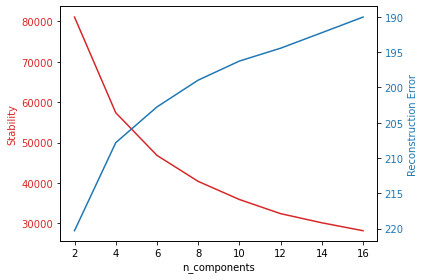

In [264]:
import matplotlib.pyplot as plt

# Extract data
n_components = list(stabilities.keys()) 
stability_values = list(stabilities.values())
error_values = list(errors.values())

# Plot 
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n_components')
ax1.set_ylabel('Stability', color=color) 
ax1.plot(n_components, stability_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Reconstruction Error', color=color)  
ax2.plot(n_components, error_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()   

fig.tight_layout()  
plt.show()
fig.savefig('stability_plot.png')

Text(0, 0.5, 'Patients')

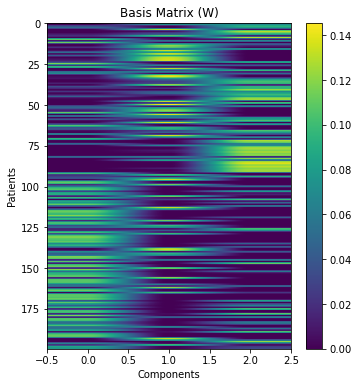

In [205]:
plt.figure(figsize=(12, 6))

# Plot the Basis Matrix (W)
plt.subplot(1, 2, 1)
plt.imshow(W, cmap=cm.viridis, aspect='auto')
plt.title('Basis Matrix (W)')
plt.xlabel('Components')
plt.colorbar()
plt.ylabel('Patients')


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50,) and arg 1 with shape (276,).

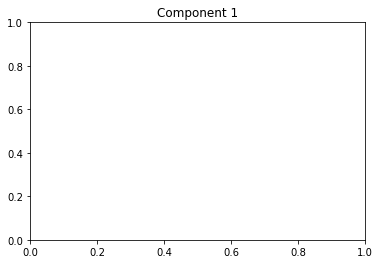

In [208]:
num_rois = 50
for c in range(H.shape[0]):
    plt.figure()
    plt.title(f'Component {c+1}')
    plt.bar(range(num_rois), H[c,:])
    plt.xticks(range(0, 276, 5)) 

Text(678.1249999999999, 0.5, 'Subjects')

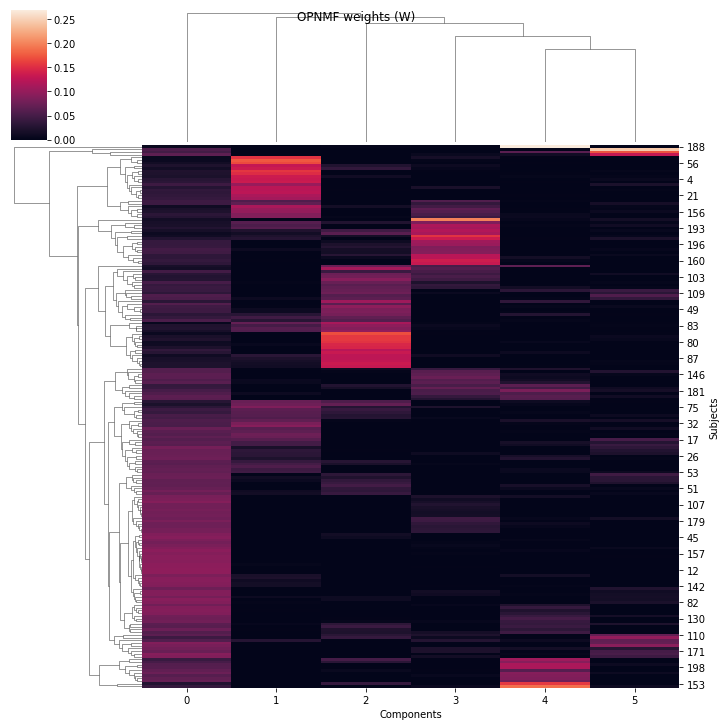

In [171]:
g = sns.clustermap(W)
g.fig.suptitle('OPNMF weights (W)')
g.ax_heatmap.set_xlabel('Components')
g.ax_heatmap.set_ylabel('Subjects')

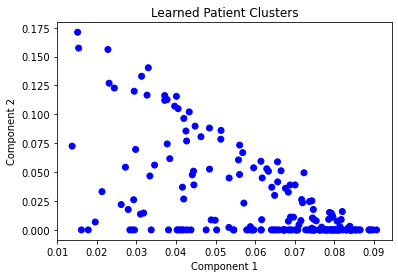

In [122]:
num_subjects = 200
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(W[:,0], W[:,1], c=['b' if i < 200 else 'r' for i in range(num_subjects)]) 
ax.set(xlabel='Component 1', ylabel='Component 2', title='Learned Patient Clusters')
plt.show()

Text(0, 0.5, 'Components')

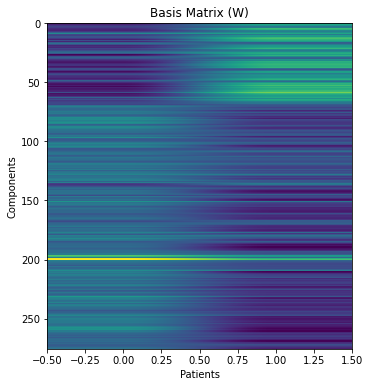

In [129]:
plt.figure(figsize=(12, 6))

# Plot the Basis Matrix (W)
plt.subplot(1, 2, 1)
plt.imshow(W.T, cmap='viridis', aspect='auto')
plt.title('Basis Matrix (W)')
plt.xlabel('Patients')
plt.ylabel('Components')